In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
pokemon=pd.read_csv('Pokemon.csv')
pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [36]:
Counter([ x for x in pokemon['Type 1']])


Counter({'Bug': 69,
         'Dark': 31,
         'Dragon': 32,
         'Electric': 44,
         'Fairy': 17,
         'Fighting': 27,
         'Fire': 52,
         'Flying': 4,
         'Ghost': 32,
         'Grass': 70,
         'Ground': 32,
         'Ice': 24,
         'Normal': 98,
         'Poison': 28,
         'Psychic': 57,
         'Rock': 44,
         'Steel': 27,
         'Water': 112})

In [33]:
featureDF=pokemon.sort('Type 1')[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']].reset_index()
featureDF

C:\Users\vashwin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,600,310,45,53,70,40,60,42,5
1,136,500,65,125,100,55,70,85,1
2,457,224,40,29,45,29,45,36,4
3,132,500,70,110,80,55,80,105,1
4,656,319,50,47,50,57,50,65,5
5,657,472,70,77,60,97,60,108,5
6,288,195,45,45,35,20,30,20,3
7,289,205,50,35,55,25,25,15,3
8,677,305,50,40,85,40,65,25,5
9,232,600,80,185,115,40,105,75,2


In [32]:
featureArr=np.array(featureDF)[:,1:]
featureArr

array([[310,  45,  53, ...,  60,  42,   5],
       [500,  65, 125, ...,  70,  85,   1],
       [224,  40,  29, ...,  45,  36,   4],
       ..., 
       [525, 130,  65, ...,  95,  65,   1],
       [316,  50,  53, ...,  48,  64,   5],
       [330,  75,  38, ...,  56,  67,   2]], dtype=int64)

In [38]:
cov_matrix=np.cov([featureArr[:,0], featureArr[:,1], featureArr[:,2], featureArr[:,3], featureArr[:,4],
        featureArr[:,5], featureArr[:,6], featureArr[:,7]])
print('Covariance matrix\n',cov_matrix)

Covariance matrix
 [[  1.43911309e+04   1.89536018e+03   2.86657184e+03   2.29235659e+03
    2.93330383e+03   2.39569712e+03   2.00784136e+03   9.64261890e+00]
 [  1.89536018e+03   6.52019323e+02   3.50068512e+02   1.90801755e+02
    3.02787559e+02   2.69117875e+02   1.30565153e+02   2.48934136e+00]
 [  2.86657184e+03   3.50068512e+02   1.05348060e+03   4.44010210e+02
    4.20967685e+02   2.38449434e+02   3.59595397e+02   2.77431320e+00]
 [  2.29235659e+03   1.90801755e+02   4.44010210e+02   9.72410707e+02
    2.28108035e+02   4.43227428e+02   1.37984543e+01   2.19748748e+00]
 [  2.93330383e+03   3.02787559e+02   4.20967685e+02   2.28108035e+02
    1.07074854e+03   4.60887309e+02   4.49804706e+02   1.98075094e+00]
 [  2.39569712e+03   2.69117875e+02   2.38449434e+02   4.43227428e+02
    4.60887309e+02   7.74448554e+02   2.09566514e+02   1.31696183e+00]
 [  2.00784136e+03   1.30565153e+02   3.59595397e+02   1.37984543e+01
    4.49804706e+02   2.09566514e+02   8.44511133e+02  -1.11623592

In [45]:
eig_value,eig_vector=np.linalg.eig(cov_matrix)
print('Eigen Value\n',eig_value)
print('Eigen Vector\n',eig_vector)


Eigen Value
 [  1.68552081e+04   1.00662427e+03   7.29238069e+02   5.26488791e+02
   4.04583456e+02   2.36627490e+02  -1.79377757e-12   2.73942930e+00]
Eigen Vector
 [[  9.23976632e-01  -2.67951420e-03   3.74363996e-03  -8.07990350e-03
    5.16673398e-02   2.55702854e-02  -3.77964473e-01  -4.55190322e-04]
 [  1.20926258e-01  -3.94099754e-02  -6.15168245e-02  -7.98227323e-01
    3.31260991e-01   3.00461834e-01   3.77964473e-01  -2.05271727e-03]
 [  1.84711254e-01  -7.08098320e-02  -7.37175622e-01  -1.33459420e-02
   -2.67853575e-01  -4.50173576e-01   3.77964473e-01  -1.66723025e-03]
 [  1.47088268e-01  -6.91033223e-01   3.62795722e-02   3.75281278e-01
   -7.23579824e-02   4.58904187e-01   3.77964473e-01  -8.70247963e-05]
 [  1.89223398e-01   3.89140848e-01   3.77341979e-01  -8.19512082e-02
   -7.08039938e-01   1.39576111e-01   3.77964473e-01  -1.32262595e-03]
 [  1.53567485e-01  -1.69881345e-01   5.36080950e-01   4.90581139e-02
    3.01052753e-01  -6.51365860e-01   3.77964473e-01   6.97

In [60]:
eig_pairs=[(np.abs(eig_value[i]),eig_vector[:,i]) for i in range(len(eig_value))]
eig_pairs.sort()
eig_pairs.reverse()
print(len(eig_pairs))
for i in range(len(eig_pairs)):
    print(eig_pairs[i][0])

8
16855.2081446
1006.62426594
729.238069046
526.488790805
404.583455567
236.627489619
2.73942929839
1.79377757083e-12


In [66]:
matrix=np.hstack((eig_pairs[0][1].reshape(8,1)
         , eig_pairs[1][1].reshape(8,1))
)

matrix

array([[  9.23976632e-01,  -2.67951420e-03],
       [  1.20926258e-01,  -3.94099754e-02],
       [  1.84711254e-01,  -7.08098320e-02],
       [  1.47088268e-01,  -6.91033223e-01],
       [  1.89223398e-01,   3.89140848e-01],
       [  1.53567485e-01,  -1.69881345e-01],
       [  1.28459969e-01,   5.79314014e-01],
       [  6.21862647e-04,  -1.93105286e-03]])

In [67]:
print(matrix.shape)
print(featureArr.shape)

(8, 2)
(800, 8)


In [69]:
transform=featureArr.dot(matrix)
transform

array([[ 334.14172587,  -25.0350585 ],
       [ 539.72298654,  -23.10514424],
       [ 240.80847608,  -10.83858603],
       ..., 
       [ 565.39367781,   11.72557109],
       [ 340.49748874,    9.79686091],
       [ 354.39449095,   18.29868502]])

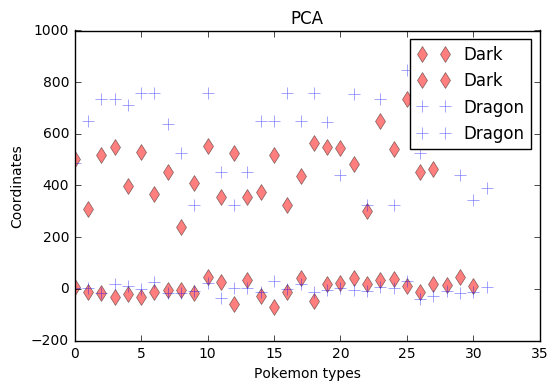

In [74]:
#plt.plot(transform[0:69],'*',markersize=8,label='Bug',alpha=0.5,color='blue')
plt.plot(transform[70:101],'d',markersize=8,label='Dark',alpha=0.5,color='red')
plt.plot(transform[101:133],'+',markersize=8,label='Dragon',alpha=0.5,color='blue')
plt.xlabel('Pokemon types')
plt.ylabel('Coordinates')
plt.title('PCA')
plt.legend()
plt.show()